<a href="https://colab.research.google.com/github/abhiyantaabhishek/tutorial/blob/master/logistic_regression_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Logistic Regression MNIST Dataset  Example

MNIST Dataset  Logistic regression example for understanding the concept 


Import the library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

Initilise the paramaters

In [2]:


num_classes = 10
num_row= num_col = 28
num_features = num_row * num_col

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

load trainning data, Here X and Y

In [3]:

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


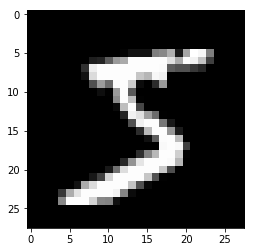

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [8]:
y_train[0]

5

In [9]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [10]:
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

In [11]:
x_train, x_test = (x_train-x_train.mean()) / x_train.std(), (x_test-x_test.mean()) / x_test.std()

In [12]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [13]:

def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred),1))


def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.optimizers.Adam(learning_rate)

In [14]:

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)
    gradients = g.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

Initiallise weight with uniform distribution

In [15]:
mu, sigma = 0, 0.1
W = tf.Variable(rng.normal(mu, sigma, (num_features,num_classes)), name="weight",dtype =tf.float32 )
b = tf.Variable(rng.normal(mu, sigma, num_classes), name="bias",dtype =tf.float32 )

Do not run below cell, its just for reference

In [ ]:
# Do not run this cell, its just for reference 
W = tf.Variable(rng.randn(num_features,num_classes), name="weight",dtype =tf.float32 )
b = tf.Variable(rng.randn(num_classes), name="bias",dtype =tf.float32 )

In [16]:

for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 50, loss: 0.568653, accuracy: 0.875000
step: 100, loss: 0.379218, accuracy: 0.890625
step: 150, loss: 0.259545, accuracy: 0.910156
step: 200, loss: 0.353476, accuracy: 0.878906
step: 250, loss: 0.398158, accuracy: 0.929688
step: 300, loss: 0.266093, accuracy: 0.925781
step: 350, loss: 0.296532, accuracy: 0.906250
step: 400, loss: 0.444803, accuracy: 0.917969
step: 450, loss: 0.310054, accuracy: 0.929688
step: 500, loss: 0.341105, accuracy: 0.925781
step: 550, loss: 0.372871, accuracy: 0.910156
step: 600, loss: 0.465605, accuracy: 0.902344
step: 650, loss: 0.289723, accuracy: 0.906250
step: 700, loss: 0.336458, accuracy: 0.917969
step: 750, loss: 0.305373, accuracy: 0.921875
step: 800, loss: 0.373735, accuracy: 0.914062
step: 850, loss: 0.340740, accuracy: 0.917969
step: 900, loss: 0.424400, accuracy: 0.906250
step: 950, loss: 0.211624, accuracy: 0.917969
step: 1000, loss: 0.367851, accuracy: 0.910156


In [18]:
pred = logistic_regression(x_test)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.907200


In [19]:
x_test.shape

(10000, 784)

In [31]:
n_images = 5
test_images = x_test[n_images].reshape(1,784)
predictions = logistic_regression(test_images)

In [28]:
test_images.shape

(1, 784)

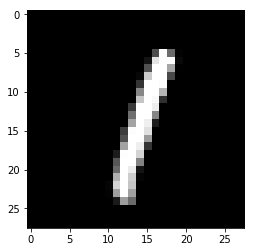

In [30]:
plt.imshow(np.reshape(test_images, [28, 28]), cmap='gray')

In [34]:
np.argmax(predictions)

1